<a href="https://colab.research.google.com/github/june-oh/cseg109/blob/main/LAB4_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.datasets
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
train_set = torchvision.datasets.MNIST(root=".",download=True,train=True)
train_set[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
transform = transforms.ToTensor()
train_set = torchvision.datasets.MNIST(root=".",download=True,train=True,transform=transform)
test_set = torchvision.datasets.MNIST(root=".",download=True,train=False,transform=transform)

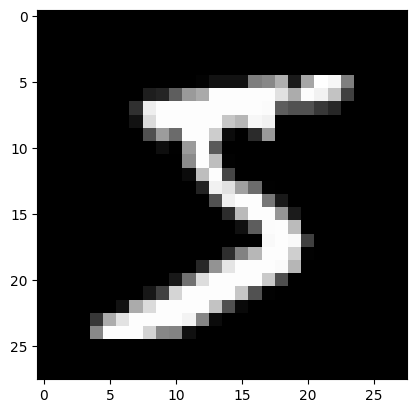

In [ ]:
plt.imshow(train_set[0][0].squeeze(0),cmap='gray')

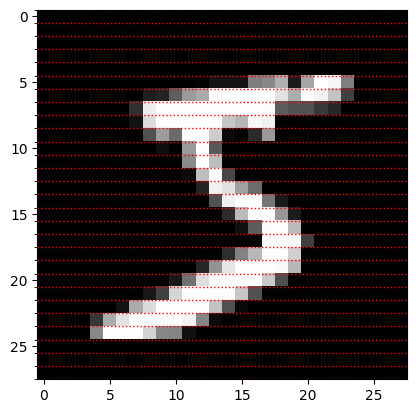

In [ ]:
plt.imshow(train_set[0][0].squeeze(0),cmap='gray')
ax = plt.gca();
ax.set_yticks(np.arange(-.5, 28, 1), minor=True)
ax.grid(which='minor', color='red', linestyle=':', linewidth=1)
plt.show()

In [ ]:
train_set[0][0].view(1,-1).shape

torch.Size([1, 784])

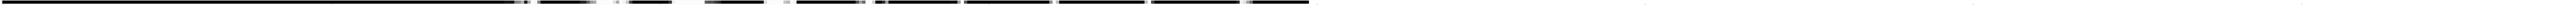

In [ ]:
plt.figure(figsize=(28*28,1),dpi=72)
plt.imshow(train_set[0][0].view(1,-1),cmap='gray')
ax = plt.gca();
#ax.set_xticks(np.arange(-.5, 28*28, 28), minor=True)
#ax.grid(which='minor', color='red', linestyle='-', linewidth=1)
plt.show()

In [ ]:
class MLPModel(nn.Module):
  def __init__(self,n_classes=10):
    super(MLPModel,self).__init__()
    self.layer = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,n_classes),
    )

  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = self.layer(x)
    return x


In [ ]:
len(train_set)

60000

In [ ]:
train_loader = DataLoader(train_set,batch_size=1024,num_workers=2)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mlp_model = MLPModel().to(device)
optim = torch.optim.Adam(mlp_model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

n_epoch = 20
pbar = tqdm(range(n_epoch))
for epoch in pbar:
  for batch in train_loader:
    x,y = batch
    x = x.to(device)
    y = y.to(device)
    optim.zero_grad()
    y_hat = mlp_model(x)
    loss = criterion(y_hat,y)
    pbar.set_postfix({"loss" : loss.item()})
    loss.backward()
    optim.step()


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
test_loader = DataLoader(test_set,batch_size=256)
acc = 0
samples = 0
mlp_model.eval()
mlp_model.to('cpu')
with torch.no_grad():
    for test_batch in test_loader:
      x,y = test_batch
      samples += y.shape[0]
      acc += (torch.argmax(mlp_model(x),-1)==y).sum().float()

print(f"{(acc/samples)*100}%")




97.38999938964844%


In [ ]:
class CNNModel(nn.Module):
  def __init__(self,n_classes=10):
    super(CNNModel,self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,padding='same'),
        nn.ReLU(),
        nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,padding='same'),
        nn.ReLU(),
        nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,padding='same'),
        nn.ReLU(),
    )
    self.mlp = nn.Linear(16*28*28,10)

  def forward(self,x):
    x = self.conv(x)
    #print(x.shape)
    x =x.view(x.shape[0],-1)
    x = self.mlp(x)
    return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cnn_model = CNNModel().to(device)
optim = torch.optim.Adam(cnn_model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

n_epoch = 20
pbar = tqdm(range(n_epoch))
for epoch in pbar:
  for batch in train_loader:
    x,y = batch
    x = x.to(device)
    y = y.to(device)
    optim.zero_grad()
    y_hat = cnn_model(x)
    loss = criterion(y_hat,y)
    pbar.set_postfix({"loss" : loss.item()})
    loss.backward()
    optim.step()


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
test_loader = DataLoader(test_set,batch_size=256)
acc = 0
samples = 0
cnn_model.eval()
cnn_model.to('cpu')
with torch.no_grad():
    for test_batch in test_loader:
      x,y = test_batch
      samples += y.shape[0]
      acc += (torch.argmax(cnn_model(x),-1)==y).sum().float()

print(f"{(acc/samples)*100}%")




98.2699966430664%


In [1]:
import torch
import torch.nn as nn

In [2]:
sample_input = torch.arange(0, 10).view(1, -1, 10).float()+1

In [3]:
sample_input

tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]])

In [4]:
#caudal convolutions
kernel_size = 3
dialation = 1
padding = (kernel_size - 1)*dialation
conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=kernel_size, stride=1, padding=padding, dilation=dialation, bias=False)


In [5]:
conv.weight

Parameter containing:
tensor([[[ 0.5773,  0.4099, -0.4033]]], requires_grad=True)

In [6]:
conv.weight.shape

torch.Size([1, 1, 3])

In [7]:
conv.weight = nn.parameter.Parameter(torch.ones(conv.weight.shape))


In [8]:
conv(sample_input)

tensor([[[ 1.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 19., 10.]]],
       grad_fn=<ConvolutionBackward0>)

In [9]:
conv(sample_input)[:,:,:-(padding)]

tensor([[[ 1.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27.]]],
       grad_fn=<SliceBackward0>)